### Joint likelihood of sum of sigmoid model with negative binomial 

# Joint Likelihood for multiplicative and negative binomial


\begin{align*}
d_1 = (a_1 + a_2 \gamma_1 )(1+\epsilon_1), \\ 
d_2 = (a_1 + a_2 \gamma_2 )(1+\epsilon_2),
\end{align*}

where $\gamma_i = \frac{1}{1 + \exp(T_1 - t_i)}$, \quad \epsilon \sim \mathcal{N}(0,\sigma^2)


multiplicative noise

$$
p(d|a_1,a_2) = p(d_1|a_1,a_2) p(d_2|a_1,a_2) = \mathcal{N}((a_1 + a_2 \gamma_1 ), (a_1 + a_2 \gamma_1 )^2 \sigma^2) \quad \mathcal{N}((a_1 + a_2 \gamma_2 ), (a_1 + a_2 \gamma_2 )^2 \sigma^2)
$$



Negative binomial

$$
p(d|a_1,a_2) = = \mathcal{NB}(r_1,p_1) \mathcal{NB}(r_2,p_2)
$$

where $p_i = \frac{1}{(a_1 + a_2 \gamma_i ) \sigma^2}, r_i = \frac{(a_1 + a_2 \gamma_i ) p_i}{1-p_i}$

In [1]:
%reset -f
import os, math, sys, random
import numpy as np
import numpy.linalg as la
import scipy.stats as st
import scipy.optimize as sopt
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
from scipy.stats import multivariate_normal

### multiplicative

data points are 36.14513430758284 48.97465283852523


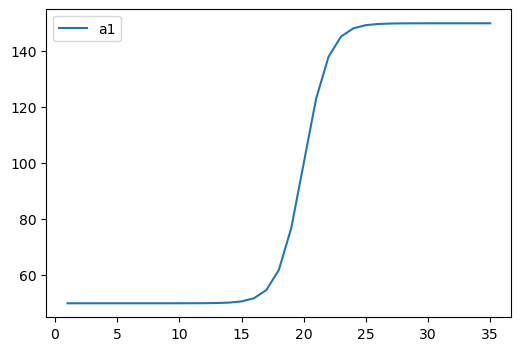

In [12]:


#### Noise 

mu_r = 0

sigma_r = 0.6

### Parameters

a0 = 50
a1 = 100

T1 = 20
t1 = 2
t2 = 32


xi1 = np.random.normal(0,sigma_r,1)

xi2 = np.random.normal(0,sigma_r,1)

Y1 = ((a0 + a1/(1 + np.exp(T1-t1)) ) * (1 + xi1 )).item() 


Y2 = ((a0 + a1/(1 + np.exp(T1-t2)) ) * (1 + xi2 )).item()



print("data points are", Y1, Y2)


t= np.linspace(1,35, 35)
beta_model = a0 + a1/(1 + np.exp((T1-t)))
plt.figure(11,figsize=(6,4))
plt.plot(t, beta_model,label='a1')
# plt.scatter([t1,t2], [Y1, Y2])
plt.legend()
# plt.savefig('./data_multiplicative.pdf')
plt.show()
plt.close()


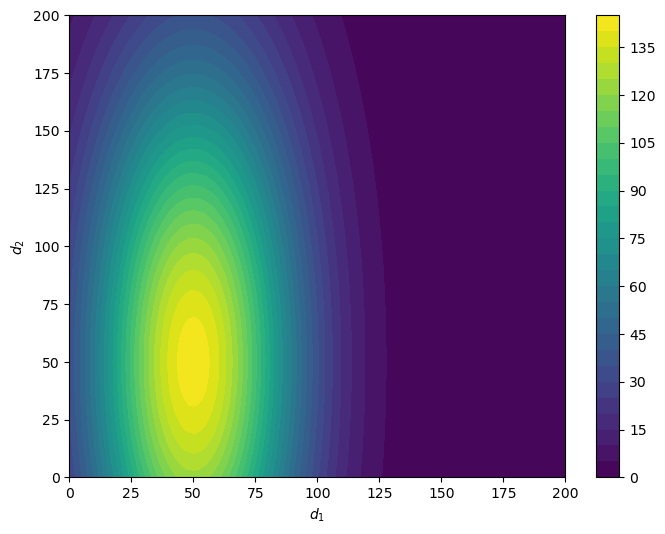

In [18]:


x2, y2 = np.linspace(0,200, 100), np.linspace(0, 200, 100)


f_t1 = (1 + np.exp(T1-t1))
f_t2 = (1 + np.exp(T1-t2))

L_a0a1 = np.zeros([len(x2), len(y2)])


var1 = (sigma_r * (a0 + a1/ f_t1 ) )**2

var2 = (sigma_r * (a0 + a1/ f_t2 ) )**2

multiplier1 = (1/np.sqrt(2*np.pi)* (sigma_r * (a0 + a1/ f_t1 )))

multiplier2 = (1/np.sqrt(2*np.pi)* (sigma_r * (a0 + a1/ f_t1 )))


for p0 in range(len(x2)):
        
    for p1 in range(len(y2)):


        err1 = np.exp(-1 * (x2[p0] - (a0 + a1/f_t1))**2 / (2 * var1 )) 

        err2 = np.exp(-1 * (y2[p1] - (a0 + a1/f_t1))**2 / (2 * var2 ))


        Lsum = multiplier1 * err1.item() * multiplier2 * err2.item()

        L_a0a1[p0,p1] = Lsum


fig = plt.figure(200,figsize=(8,6))
P, Q = np.meshgrid(x2,y2)
Lt = np.transpose(L_a0a1)
plt.contourf(P, Q, Lt, levels=30, cmap="viridis")
plt.xlabel('$d_{1}$')
plt.ylabel('$d_{2}$')
plt.colorbar()
# plt.savefig('./product_of_likelihood_multiplicative.pdf')
plt.show()
plt.close()



### Negative binomial

fucntion values 50.00000152299795 149.9993855825398
probability of successes 0.05555555386333567 0.01851859437283666
number of successes 2.9411764653183465 2.8301888979779366


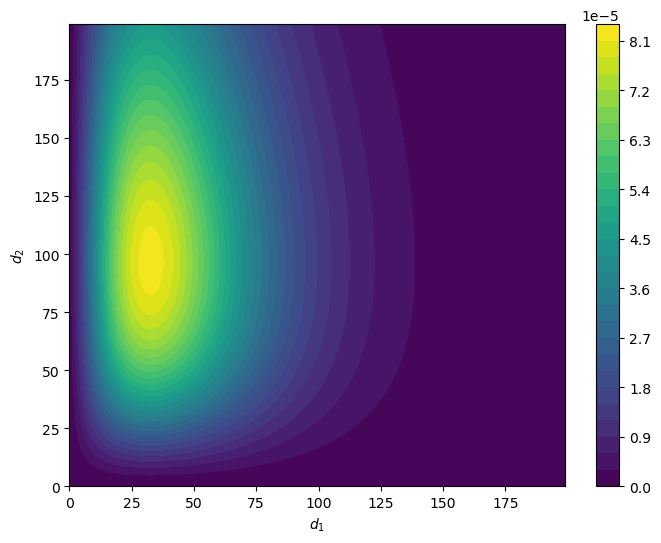

In [17]:

x2, y2 = np.arange(0,200, 1), np.arange(0, 200, 1)


f_t1 = (1 + np.exp(T1-t1))
f_t2 = (1 + np.exp(T1-t2))

val1 = (a0 + a1/ f_t1 )

val2 = (a0 + a1/ f_t2 )

p1 = 1/(sigma_r**2 * val1) #probability of success

p2 = 1/(sigma_r**2 * val2) #probability of success


if(p1 >= 1 or p1 < 0.0 or p2 >= 1 or p2 < 0.0):
    print("Error in probability of success")

## mean = r(1-p)/p = data1

r1 = (val1) * p1 / (1-p1)

r2 = (val2) * p2 / (1-p2)


print('fucntion values', val1, val2)
print("probability of successes", p1, p2)
print("number of successes", r1, r2)

NB_a0a1 = np.zeros([len(x2), len(y2)])



for k in range(len(x2)):
        
    for l in range(len(y2)):



        # val1 = (x2[k] + y2[l]/ f_t1 )

        # val2 = (x2[k] + y2[l]/ f_t2 )

        from scipy import stats 

        from scipy.special import gamma, factorial




        # pdf1 = gamma(x2[k]+r1)/(gamma(r1) * factorial(x2[k]) ) * p1**r1 * (1-p1)**x2[k]
        # pdf2 = gamma(y2[l]+r2)/(gamma(r2) * factorial(y2[l]) ) * p1**r2 * (1-p2)**y2[l]
        
        pdf1 = stats.nbinom.pmf(x2[k],r1, p1)
        pdf2 = stats.nbinom.pmf(y2[l],r2, p2)

        
        NB_a0a1[k,l] = pdf1 * pdf2




fig = plt.figure(200,figsize=(8,6))
P1, Q1 = np.meshgrid(x2,y2)
NB = np.transpose(NB_a0a1)
plt.contourf(P1, Q1, NB, levels=30, cmap="viridis")
plt.xlabel('$d_{1}$')
plt.ylabel('$d_{2}$')
plt.colorbar()
# plt.savefig('./product_of_likelihood_multiplicative.pdf')
plt.show()
plt.close()

